## Plot results

Read data

In [2]:
%run -m setup
continents_filename = 'continent_shapefile/continent.shp'
density_raster_filename = 'mass_density_raster.tif'
biomass_by_cont = 'mass_by_continent.csv'
grouped = pd.read_csv(path_to_results+'results_grouped_by_order.csv')
results = pd.read_csv(path_to_results+'wild_land_mammal_biomass.csv')

#### Plot figure 1b
Figure 1a was created manually

Biomass  Species  percent_biomass  percent_species
0       12      393             55.0              6.0
1       10     4413             45.0             94.0

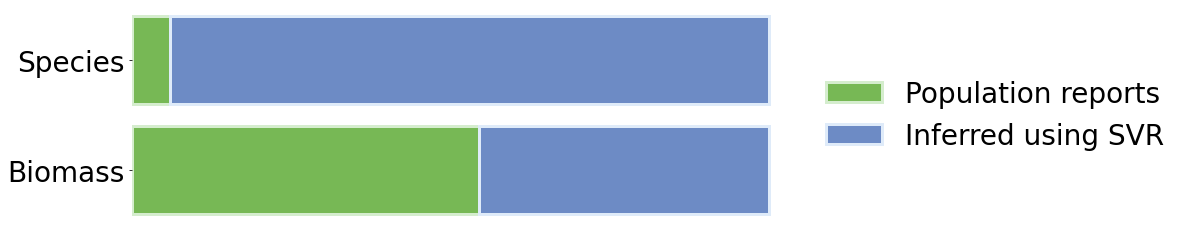

In [3]:
font = {'size'   : 28}
plt.rc('font', **font)
plt.rcParams['hatch.color'] = 'white'
plt.rcParams['hatch.linewidth'] = 5


results_by_method['n_species_norm'] = pd.Series([0.06,0.94]) 
results_by_method['biomass_norm'] = (results_by_method['Biomass'] / results_by_method['Biomass'].sum()) 

column_names = ['Biomass', 'Species']
columns = ['biomass_norm','n_species_norm']

fig =plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

colors = ['#77b855ff','#6d8bc5ff'] #'#fafab8ff'
edgecolors = ['#d5edceff','#dfebf9ff'] #'#d1b33fff'6d8bc5ff
prev = [0,0]
for method in range(0,len(results_by_method)):
    hatch = False
    ax.barh(column_names,results_by_method.iloc[method][columns], left = prev,label=results_by_method.iloc[method]['Category'], 
            color = colors[method], edgecolor = edgecolors[method], linewidth = 3)
    prev = results_by_method.iloc[method][columns]+prev

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5),frameon=False, labelspacing=-2.5)

ax.set_frame_on(False)
ax.set_xticks([])
# plt.savefig(path_to_plots+'fig_1_b.svg',dpi = 800,bbox_inches='tight')
results_by_method = results_by_method.assign(percent_biomass = np.round(results_by_method.biomass_norm*100),
                                             percent_species = np.round(results_by_method.n_species_norm*100))
results_by_method.drop(['Category','Unnamed: 0','n_species_norm','biomass_norm'], axis  = 1)

#### Plot figure 2
The mammal siluhettes were added manually

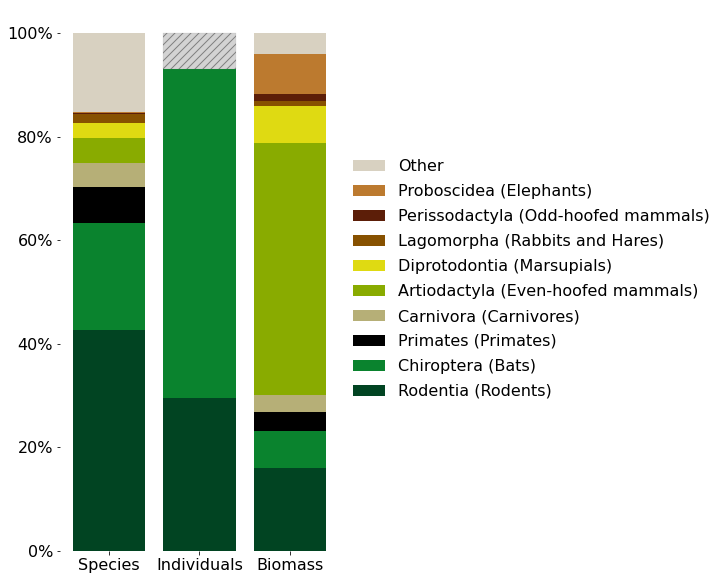

In [91]:
## stacked barplot- figure 2
## bars: n_species, n_individuals and mass
## categories: taxonomic orders
grouped = pd.read_csv(path_to_results+'results_grouped_by_order.csv')

font = {'size'   : 16}
plt.rc('font', **font)

color_dict = {'Rodentia (Rodents)':'#014422ff', 
              'Perissodactyla (Odd-hoofed mammals)':'#5c1e08ff',
              'Primates (Primates)':'#000000ff', 
              'Proboscidea (Elephants)':'#bc7a2fff',
              'Lagomorpha (Rabbits and Hares)':'#875100ff', 
              'Diprotodontia (Marsupials)': '#dfda12ff',#'#eaa200ff',
              'Chiroptera (Bats)':'#0a832eff', 
              'Artiodactyla (Even-hoofed mammals)':'#89ab00ff',
              'Carnivora (Carnivores)':'#b6af77ff',
              'Other':'#d8d1c1ff'}

grouped = grouped.sort_values(by = 'n_species_norm', ascending = False)
# grouped = grouped.set_index(['Order_common'])

column_names = ['Species','Individuals', 'Biomass']
columns = ['n_species_norm','individuals_norm','predicted_mass_Mt_norm']
other_df = grouped[grouped['Order_common']=='Other']
grouped = grouped[grouped['Order_common']!='Other']
grouped = pd.concat([grouped,other_df])

plt.figure(figsize=(5, 10))
prev = [0,0,0]
for order in range(0,len(grouped)):
    plt.bar(column_names,grouped.iloc[order][columns], bottom = prev,label=grouped.iloc[order]['Order_common'], width = 0.8, 
            color = color_dict[grouped.iloc[order]['Order_common']])
    prev = grouped.iloc[order][columns]+prev
    


rodent_and_bat_ind_fraction = grouped.iloc[0]['individuals_norm']+grouped.iloc[1]['individuals_norm']
plt.bar(1,1-rodent_and_bat_ind_fraction, bottom = rodent_and_bat_ind_fraction, width = 0.8, 
        color = 'lightgray',hatch = '///', edgecolor = 'gray', linewidth = 0.1)    

plt.box(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False, labelspacing=-2.5)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.savefig(path_to_plots+'fig_3_grouped.svg',dpi = 800,bbox_inches='tight')
plt.show()



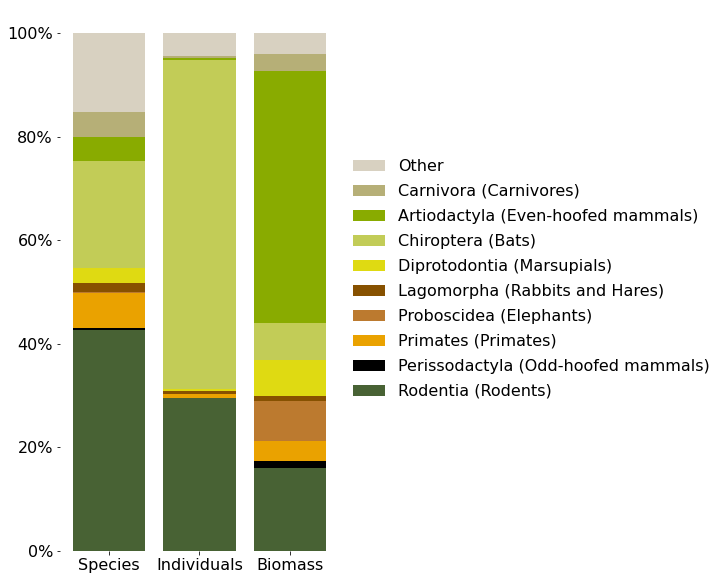

In [16]:
## stacked barplot- figure 2
## bars: n_species, n_individuals and mass
## categories: taxonomic orders
grouped = pd.read_csv(path_to_results+'results_grouped_by_order.csv')

font = {'size'   : 16}
plt.rc('font', **font)
grouped = grouped.set_index('Order_common')
grouped = grouped.reindex(['Rodentia (Rodents)', 'Perissodactyla (Odd-hoofed mammals)','Primates (Primates)', 
                           'Proboscidea (Elephants)','Lagomorpha (Rabbits and Hares)', 'Diprotodontia (Marsupials)',
                           'Chiroptera (Bats)', 'Artiodactyla (Even-hoofed mammals)','Carnivora (Carnivores)','Other']).reset_index()


column_names = ['Species','Individuals', 'Biomass']
columns = ['n_species_norm','individuals_norm','predicted_mass_Mt_norm']

plt.figure(figsize=(5, 10))
colors = ['#486234ff','#000000ff','#eaa200ff','#bc7a2fff','#875100ff','#dfda12ff',
          '#c2cc57ff','#89ab00ff','#b6af77ff','#d8d1c1ff']
prev = [0,0,0]
for order in range(0,len(grouped)):
    plt.bar(column_names,grouped.iloc[order][columns], bottom = prev,label=grouped.iloc[order]['Order_common'], width = 0.8, color = colors[order])
    prev = grouped.iloc[order][columns]+prev

plt.box(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False, labelspacing=-2.5)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
# plt.savefig(path_to_plots+'fig_3.svg',dpi = 800,bbox_inches='tight')
# plt.savefig(path_to_plots+'fig_3.png',dpi = 800,bbox_inches='tight')
plt.show()



#### Create a mass density map of the world (figure 3):
This cell below runs an R script generating a mass density raster file. The product can be found in this repository (in the data/map_data/ directory), so  you can skip this step. </br>
<b> It is important to note that the r script below requires 4 available cores, as determined by the n_cores integer variable. </b> Increasing its value will shorten runtime significantly, and vice versa.

In [9]:
path_to_wd = os.path.abspath(os.getcwd())
command ='Rscript'
path_to_script =path_to_wd+'/gen_mass_density_raster.R'
n_cores = "4"
args = [n_cores,
        path_to_results,
        path_to_data,
        path_to_map_data,
        path_to_species_rasters,
        path_to_rasters_w_density,
        proj4string,
        path_to_wd
       ]

cmd = [command, path_to_script]+args
r_output = subprocess.check_output(cmd, universal_newlines=True)

This cell below runs an R script generating a .csv file containing the total mass for each continent. The product can be found in this repository (in the data/map_data/ directory), so that you can skip this step. 

In [8]:
path_to_wd = os.path.abspath(os.getcwd())
command ='Rscript'
path_to_script =path_to_wd+'/mass_by_cont.R'

args = [path_to_map_data,
       continents_filename,
       density_raster_filename,
       proj4string,
       spatial_res_m]

cmd = [command, path_to_script]+args
r_output = subprocess.check_output(cmd, universal_newlines=True)

The text on the original figure was added manually.

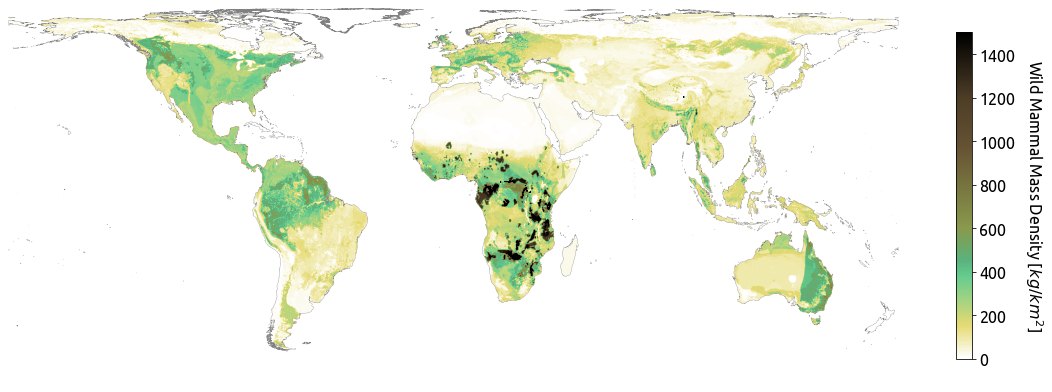

In [8]:
%run -m generate_map
density_raster_filename
fig, ax = plot_map(path_to_map_data+continents_filename,path_to_map_data+density_raster_filename,path_to_map_data+biomass_by_cont)
fig.savefig('plots/mass_density_map.svg', format='svg')

#### Generate the data required to plot the Voronoi diagram (Figure 4)
Go to the d3-voronoi-map folder to generate the plot itself.
The plot used in the main manuscript was based on the plot generated by the d3-voronoi-map, and later manually designed.

In [9]:
wild_marine = pd.read_csv(path_to_results+'wild_marine_biomass.csv').rename({'biomass_Mt':'mass'},axis = 1)
domesticated = pd.read_csv(path_to_results+'human_and_domesticated.csv')[['Item','biomass_Mt']].rename({'biomass_Mt':'mass'},axis = 1)
domesticated['Level_2'] = domesticated['Item']
wild_mammal_mass = grouped[['Order_common','biomass_Mt']]
wild_terrestrial = wild_mammal_mass.rename({'biomass_Mt':'mass'},axis = 1)

def subset_and_rename(df, col_name, common_names_dict, df_type):
    if dict != 0:
        df = df.replace({col_name: common_names_dict})
    df = df.rename({col_name: 'Level_2', 'total_mass': 'mass'}, axis=1)
    df = df.groupby('Level_2').agg('sum').reset_index()
    df['Level_1'] = df_type
    df = df[['Level_1', 'Level_2', 'mass']]
    return df

marine_dict = {'Balaenidae': 'Baleen whales',
               'Balaenopteridae': 'Baleen whales',
               'Neobalaenidae': 'Baleen whales',
               'Eschrichtiidae': 'Baleen whales',
               'Physeteridae': 'Sperm whales',
               'Kogiidae': 'Sperm whales',
               'Ziphiidae': 'Beaked whales',
               'Monodontidae': 'Dolphins and Porpoises',
               'Platanistidae': 'Dolphins and Porpoises',
               'Iniidae': 'Dolphins and Porpoises',
               'Lipotidae': 'Dolphins and Porpoises',
               'Delphinidae': 'Dolphins and Porpoises',
               'Pontoporiidae': 'Dolphins and Porpoises',
               'Phocoenidae': 'Dolphins and Porpoises',
               'Trichechidae': 'Other',
               'Dugongidae': 'Other',
               'Otariidae': 'Other',
               'Phocidae': 'Earless seals',
               'Ursidae': 'Other',
               'Mustelidae': 'Other',
               'Odobenidae': 'Other'
               }

marine_dict = {k.upper(): v for k, v in marine_dict.items()}
terrestrial_dict = {'Perissodactyla (Odd-hoofed mammals)':'Other',
                    'Lagomorpha (Rabbits and Hares)':'Other'}

domesticated_dict = {'Camels':'Camels and camelids',
                    'Camelids, other':'Camels and camelids',
                     'Asses':'Donkeys and mules',
                     'Mules':'Donkeys and mules',
                    'Rabbits and hares':'Other',
                    'Rats':'Other',
                    'Mouse':'Other',
                    'Rodents, other':'Other'
                   }


wild_marine = subset_and_rename(wild_marine, 'Family', marine_dict, 'Marine')
wild_terrestrial = subset_and_rename(wild_terrestrial, 'Order_common', terrestrial_dict, 'Terrestrial')
domesticated = subset_and_rename(domesticated, 'Level_2', domesticated_dict, 'Domesticated')

all_species = pd.concat([wild_marine, wild_terrestrial, domesticated])
all_species.loc[all_species['Level_2'] == 'Human', 'Level_1'] = 'Human'
all_species = all_species.reset_index(drop = True)
all_species['mass'] = round(all_species['mass'],1)
all_species = all_species.sort_values(by = ['Level_1','mass'], ascending= False)
all_species.to_csv('d3-voronoi-map/voronoi_data.csv')
all_species

Level_1                             Level_2   mass
6    Terrestrial  Artiodactyla (Even-hoofed mammals)   10.9
13   Terrestrial                  Rodentia (Rodents)    3.6
12   Terrestrial             Proboscidea (Elephants)    1.7
8    Terrestrial                   Chiroptera (Bats)    1.6
9    Terrestrial          Diprotodontia (Marsupials)    1.6
10   Terrestrial                               Other    1.4
11   Terrestrial                 Primates (Primates)    0.8
7    Terrestrial              Carnivora (Carnivores)    0.7
0         Marine                       Baleen whales   23.3
5         Marine                        Sperm whales    6.7
3         Marine                       Earless seals    4.9
2         Marine              Dolphins and Porpoises    2.7
1         Marine                       Beaked whales    0.9
4         Marine                               Other    0.5
22         Human                               Human  393.7
17  Domesticated                              Cattle  416.0
14  Domesticated                           Buffaloes   67.6
24  Domesticated                               Sheep   38.9
25  Domesticated                               Swine   38.2
20  Domesticated                               Goats   32.0
18  Domesticated                                 Dog   21.6
21  Domesticated                              Horses   16.1
15  Domesticated                 Camels and camelids    8.7
19  Domesticated                   Donkeys and mules    7.5
16  Domesticated                                 Cat    2.2
23  Domesticated                               Other    1.1